In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
read_df = pd.read_parquet('twitter_data.parquet')
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet,de
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet,de
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet,de
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet,de


In [4]:
read_df = read_df.drop_duplicates(subset=['tweet_id'])
read_df.shape

(181552, 13)

In [5]:
read_df['tweet_language'].value_counts()

de         159811
en          18586
sv           1296
nl            345
fr            314
tl            195
cy            181
it            166
id            159
unknown       120
es             51
ja             49
fi             33
no             28
pl             28
sw             24
pt             22
af             19
et             17
ca             16
so             14
da             14
tr             11
ro             11
cs              7
ar              7
sl              6
hr              5
sk              4
vi              3
hi              2
fa              2
hu              2
th              1
sq              1
ru              1
lv              1
Name: tweet_language, dtype: int64

In [6]:
read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,☝️⬇️ #IchbinHanna #PeerReview https://t.co/PFN...,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread ⬇️ about the cruel #precarity in German...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread ⬇️ zu #Machtmissbrauch in der...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [7]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

read_df.text = read_df.text.apply(remove_emojis)
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,#IchbinHanna #PeerReview https://t.co/PFNrovEOAS,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel #precarity in German #...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu #Machtmissbrauch in der #...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [8]:
def remove_mentions_and_tags(text): #Removing mentions and hashtags and url
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'http\S+', '', text)
    return re.sub(r'#\S*', '', text)

read_df.text = read_df.text.apply(remove_mentions_and_tags)

In [9]:
read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2773504966.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations


In [10]:
read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2955464902.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number


In [11]:
#English

In [12]:
en_df = read_df[read_df.tweet_language == 'en']
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en


In [13]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [14]:
#getting nouns and adjectives
import nltk
nltk.download('punkt')
from HanTa import HanoverTagger as ht

en_tagger = ht.HanoverTagger('morphmodel_en.pgz')

def en_noun(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'NN']
  return tokens

def en_adj(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'ADJ']
  return tokens

en_df['en_noun'] = en_df.text.apply(en_noun)
en_df['en_adj'] = en_df.text.apply(en_adj)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2603410340.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_noun'] = en_df.text.apply(en_noun)
C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2603410340.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_adj'] = en_df.text.apply(en_adj)


In [15]:
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[Thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[Thread, video, Ministry, Education, Research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, Ministry, Education, Rese...",[]


In [16]:
en_df.en_adj.unique

<bound method Series.unique of 11        []
105       []
125       []
215       []
238       []
          ..
308092    []
308243    []
308292    []
308293    []
308323    []
Name: en_adj, Length: 6129, dtype: object>

In [17]:
en_df.en_noun.unique

<bound method Series.unique of 11                                         [Thread, debate]
105       [Thread, video, Ministry, Education, Research,...
125                                     [job, impact, life]
215                                                      []
238       [post, comment, job, Ministry, Education, Rese...
                                ...                        
308092                                                   []
308243    [host, seminar, postdoc, nittygritty, law, sem...
308292                                         [rate, cant]
308293                                              [right]
308323         [fellow, profs, problem, collection, action]
Name: en_noun, Length: 6129, dtype: object>

In [18]:
def to_lowercase(text):
  token = []
  for i in range(len(text)):
    val = text[i].lower()
    token.append(val)
  return token

en_df.en_noun = en_df.en_noun.apply(to_lowercase)

en_df.head()

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2124371995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_noun = en_df.en_noun.apply(to_lowercase)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[thread, video, ministry, education, research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, ministry, education, rese...",[]


In [19]:
en_df.en_adj = en_df.en_adj.apply(to_lowercase)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\736935701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_adj = en_df.en_adj.apply(to_lowercase)


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
english_stop_words.append('amp')

def stop_word_en_removal(x):
    return ' '.join([w for w in x if not w in english_stop_words])

en_df.en_noun = en_df.en_noun.apply(stop_word_en_removal)
en_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\1942927101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_noun = en_df.en_noun.apply(stop_word_en_removal)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,[]


In [21]:
en_df.en_adj = en_df.en_adj.apply(stop_word_en_removal)
en_df.head()

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\3399689501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_adj = en_df.en_adj.apply(stop_word_en_removal)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,


In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
#lemmatizer
import nltk
import pandas as pd

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'n') for w in w_tokenizer.tokenize(text)]

def lemmatize_text_adj(text):
  return [lemmatizer.lemmatize(w,'a') for w in w_tokenizer.tokenize(text)]


en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)
# en_df['text_lemmatized_adj'] = en_df.en_noun.apply(lemmatize_text_adj)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_31656\2299315245.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)


In [24]:
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj,text_lemmatized_noun
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,,"[thread, debate]"
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,,"[thread, video, ministry, education, research,..."
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,,"[job, impact, life]"
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,,[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,,"[post, comment, job, ministry, education, rese..."


Document-Term Matrix

In [77]:
dict_docs =  en_df.text_lemmatized_noun.to_dict()
# print(dict_docs)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vects = vect.fit_transform(en_df.en_noun)

newdf = pd.DataFrame(vects.todense())
newdf.columns = vect.get_feature_names()

tdm = newdf.T
tdm.columns = ['Doc '+str(i) for i in range(newdf.shape[0])]
tdm['total_count'] = tdm.sum(axis=1)

tdm = tdm.sort_values(by = 'total_count', ascending=False)
print(tdm.drop(columns=['total_count']).head())

c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


          Doc 0  Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  \
academia      0      0      0      0      0      0      1      0      0   
research      0      1      0      0      1      0      0      0      0   
system        0      0      0      0      0      0      0      0      0   
time          0      0      0      0      0      0      0      0      0   
job           0      0      1      0      1      0      0      0      0   

          Doc 9  ...  Doc 6119  Doc 6120  Doc 6121  Doc 6122  Doc 6123  \
academia      0  ...         1         0         0         0         0   
research      0  ...         0         0         0         0         0   
system        1  ...         0         0         0         0         0   
time          0  ...         0         0         0         0         0   
job           1  ...         0         0         0         1         0   

          Doc 6124  Doc 6125  Doc 6126  Doc 6127  Doc 6128  
academia         0         0         0     

In [28]:
tdm

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 6120,Doc 6121,Doc 6122,Doc 6123,Doc 6124,Doc 6125,Doc 6126,Doc 6127,Doc 6128,total_count
academia,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,811
research,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,481
system,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,431
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,357
job,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imaginingamporganising,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
imher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
immobility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
immune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
tdm = tdm.drop(columns=['total_count'], axis =1)
tdm

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 6119,Doc 6120,Doc 6121,Doc 6122,Doc 6123,Doc 6124,Doc 6125,Doc 6126,Doc 6127,Doc 6128
academia,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
research,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
system,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imaginingamporganising,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
immobility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
immune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
dtm = tdm.to_numpy()
print(type(dtm))

<class 'numpy.ndarray'>


In [31]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 320.9/320.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 99.7/99.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for lda: filename=lda-2.0.0-cp310-cp310-win_amd64.whl size=337304 sha256=dd02d4499d4737ae6ca6de3d41a41ffdd7bae5f5ab28834756d34a67106f20af
  Stored in directory: C:\Users\Moinam\AppData\Local\Temp\pip-ephem-wheel-cache-2e8rczdr\wheels\e4\7d\7f\71c0224fc388d833560fbcff5ecb3221f474b483e392bbebf9
Successfully built lda


In [70]:
import lda
# tdm_lda = lda.LDA(n_topics = 10, n_iter = 1000, random_state=42)
vocab = en_df.en_noun
# tdm_lda.fit(dtm)
n_topics = []
log_likelihoods = []
lda_models = []

for i in range(2,41):
    n_topics.append(i)

for i in n_topics:
    tdm_lda = lda.LDA(n_topics=i, n_iter=1000, random_state=42)
    tdm_lda.fit(dtm)
    log_likelihoods.append(tdm_lda.loglikelihoods_[99])
    lda_models.append(tdm_lda)

# topic_word = tdm_lda.topic_word_
# n_top_words = 15
# for i, topic_dist in enumerate(topic_word):
#     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    # print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:lda:n_documents: 3655
INFO:lda:vocab_size: 6129
INFO:lda:n_words: 24949
INFO:lda:n_topics: 2
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -267998
INFO:lda:<10> log likelihood: -237173
INFO:lda:<20> log likelihood: -236434
INFO:lda:<30> log likelihood: -235978
INFO:lda:<40> log likelihood: -235969
INFO:lda:<50> log likelihood: -235669
INFO:lda:<60> log likelihood: -235641
INFO:lda:<70> log likelihood: -235479
INFO:lda:<80> log likelihood: -235501
INFO:lda:<90> log likelihood: -235255
INFO:lda:<100> log likelihood: -235266
INFO:lda:<110> log likelihood: -235215
INFO:lda:<120> log likelihood: -235273
INFO:lda:<130> log likelihood: -235028
INFO:lda:<140> log likelihood: -234838
INFO:lda:<150> log likelihood: -234816
INFO:lda:<160> log likelihood: -234830
INFO:lda:<170> log likelihood: -234792
INFO:lda:<180> log likelihood: -234790
INFO:lda:<190> log likelihood: -234611
INFO:lda:<200> log likelihood: -234618
INFO:lda:<210> log likelihood: -234674
INFO:lda:<220> log likelihood: -2

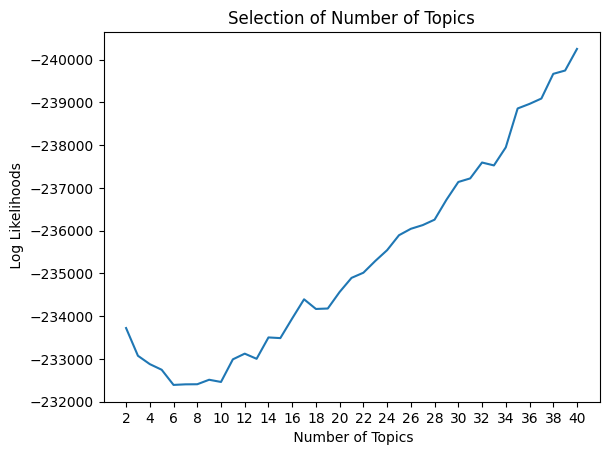

In [71]:
plt.plot(n_topics, log_likelihoods)
plt.xticks(np.arange(min(n_topics), max(n_topics)+1, 2))
plt.gca().invert_yaxis()
plt.title('Selection of Number of Topics')
plt.xlabel(' Number of Topics')
plt.ylabel(' Log Likelihoods')
plt.show()


In [85]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def create_dictionary(words):
  return corpora.Dictionary(words)


def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus

#passing the dataframe column having tokens as the argument
en_id2word = create_dictionary(en_df.tokens)

#passing the dataframe column having tokens and dictionary
en_corpus = create_document_matrix(en_df.tokens, en_id2word)


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<3657 unique tokens: ['debate', 'thread', 'discussion', 'education', 'indignation']...> from 6129 documents (total 25094 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<3657 unique tokens: ['debate', 'thread', 'discussion', 'education', 'indignation']...> from 6129 documents (total 25094 corpus positions)", 'datetime': '2023-01-27T03:58:52.939088', 'gensim': '4.3.0', 'python': '3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.25281-SP0', 'event': 'created'}


In [82]:
en_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=en_corpus, id2word=en_id2word, num_topics=6, random_state=42)


INFO:gensim.models.ldamodel:using symmetric alpha at 0.16666666666666666
INFO:gensim.models.ldamodel:using symmetric eta at 0.16666666666666666
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 6129 documents, updating model once every 2000 documents, evaluating perplexity every 6129 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/6129
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 6129 documents
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.066*"academia" + 0.029*"work" + 0.017*"research" + 0.016*"contract" + 0.013*"job" + 0.012*"year" + 0.012*"career" + 0.011*"time" + 0.011*"system" + 0.010*"employment"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.053*"system" + 0.023*"academia" + 0.020*"job" + 0.020*"precarity" + 0.019*"research" + 0

In [ ]:
# !pip install pyldavis


In [83]:
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(en_lda_model,
                                     en_corpus,
                                     dictionary=en_lda_model.id2word)
vis


c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.118507  0.136818       1        1  20.992721
3      0.009935  0.068060       2        1  20.653566
4      0.048813  0.011897       3        1  15.605000
2     -0.038101 -0.154321       4        1  15.578779
1      0.081964 -0.122609       5        1  13.625646
0     -0.221118  0.060154       6        1  13.544287, topic_info=         Term        Freq       Total Category  logprob  loglift
1      thread  264.000000  264.000000  Default  30.0000  30.0000
957     click  215.000000  215.000000  Default  29.0000  29.0000
955     music  194.000000  194.000000  Default  28.0000  28.0000
31     system  344.000000  344.000000  Default  27.0000  27.0000
348      link  349.000000  349.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
29    problem   33.045813   84.705596   Topic6  -4.6333   1.0579
7    research   45.296925  341.380733   Topic6  -4.3179  -0.0206
20   academia   51.771778  595.872925   Topic6  -4.1843  -0.4440
107  security   30.217610   72.810252   Topic6  -4.7228   1.1198
52       time   29.400897  342.890005   Topic6  -4.7502  -0.4572

[340 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
20        1  0.372563  academia
20        2  0.151039  academia
20        3  0.300400  academia
20        4  0.020139  academia
20        5  0.070485  academia
...     ...       ...       ...
35        2  0.226334      year
35        3  0.056583      year
35        4  0.032333      year
35        5  0.032333      year
35        6  0.080834      year

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 3, 2, 1])